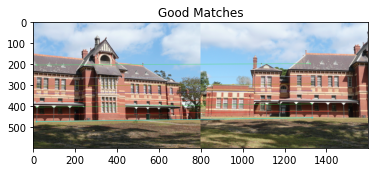

True

In [1]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import os
import matplotlib.pyplot as plt

# parser = argparse.ArgumentParser(description='Code for Feature Matching with FLANN tutorial.')
# parser.add_argument('--input1', help='Path to input image 1.', default='box.png')
# parser.add_argument('--input2', help='Path to input image 2.', default='box_in_scene.png')
# args = parser.parse_args()

# img1 = cv.imread(cv.samples.findFile(args.input1), cv.IMREAD_GRAYSCALE)
# img2 = cv.imread(cv.samples.findFile(args.input2), cv.IMREAD_GRAYSCALE)

relativePathFolder = 'images/big_house/source_images/'
outputSavePath = 'images/big_house/'
img1 = cv.imread(os.path.join(relativePathFolder, '1.jpg'))
img2 = cv.imread(os.path.join(relativePathFolder, '2.jpg'))
   
if img1 is None or img2 is None:
    print('Could not open or find the images!')
    exit(0)
#-- Step 1: Detect the keypoints using SURF Detector, compute the descriptors

detector = cv.SIFT_create()

# minHessian = 400
# detector = cv.xfeatures2d_SURF.create(hessianThreshold=minHessian)
keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
keypoints2, descriptors2 = detector.detectAndCompute(img2, None)
#-- Step 2: Matching descriptor vectors with a FLANN based matcher
# Since SURF is a floating-point descriptor NORM_L2 is used
matcher = cv.DescriptorMatcher_create(cv.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(descriptors1, descriptors2, 2)
#-- Filter matches using the Lowe's ratio test
ratio_thresh = 0.7
good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)
#-- Draw matches
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
cv.drawMatches(img1, keypoints1, img2, keypoints2, good_matches[10:20], img_matches, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#-- Show detected matches

plt.imshow(img_matches[:,:,::-1])
plt.title('Good Matches')
plt.show()
cv.imwrite(f"{outputSavePath}matches.jpg", img_matches)

# cv.imshow('Good Matches', img_matches)
# cv.waitKey()
